## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [2]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    """Code Here
    建立你的神經網路
    """
    return model

In [12]:
learning_rate = 1e-3
epochs = 50
batch_size = 256
momentum = 0.95
dropout_exp = [0.1, 0.2, 0.25, 0.5]

"""Code Here
設定超參數
"""

'Code Here\n設定超參數\n'

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_ratio in dropout_exp:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    model.fit(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(x_test, y_test),
             shuffle=True)
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-drpratio-{}'.format(drop_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0   

196/196 [==============================] - 4s 22ms/step - loss: 1.1517 - accuracy: 0.5837 - val_loss: 1.3325 - val_accuracy: 0.5321
Epoch 49/50
196/196 [==============================] - 4s 22ms/step - loss: 1.1588 - accuracy: 0.5820 - val_loss: 1.3271 - val_accuracy: 0.5336
Epoch 50/50
196/196 [==============================] - 4s 22ms/step - loss: 1.1479 - accuracy: 0.5842 - val_loss: 1.3225 - val_accuracy: 0.5298
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None,

196/196 [==============================] - 4s 22ms/step - loss: 1.4118 - accuracy: 0.4906 - val_loss: 1.3971 - val_accuracy: 0.5035
Epoch 46/50
196/196 [==============================] - 4s 22ms/step - loss: 1.3916 - accuracy: 0.5004 - val_loss: 1.3970 - val_accuracy: 0.5020
Epoch 47/50
196/196 [==============================] - 4s 21ms/step - loss: 1.4005 - accuracy: 0.4983 - val_loss: 1.3915 - val_accuracy: 0.5037
Epoch 48/50
196/196 [==============================] - 4s 22ms/step - loss: 1.4014 - accuracy: 0.4967 - val_loss: 1.3916 - val_accuracy: 0.5060
Epoch 49/50
196/196 [==============================] - 4s 22ms/step - loss: 1.3885 - accuracy: 0.4970 - val_loss: 1.3942 - val_accuracy: 0.5013
Epoch 50/50
196/196 [==============================] - 4s 22ms/step - loss: 1.3946 - accuracy: 0.4989 - val_loss: 1.4006 - val_accuracy: 0.5005
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

196/196 [==============================] - 5s 25ms/step - loss: 1.5176 - accuracy: 0.4542 - val_loss: 1.4968 - val_accuracy: 0.4605
Epoch 43/50
196/196 [==============================] - 4s 23ms/step - loss: 1.5025 - accuracy: 0.4594 - val_loss: 1.4778 - val_accuracy: 0.4780
Epoch 44/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5052 - accuracy: 0.4566 - val_loss: 1.4630 - val_accuracy: 0.4796
Epoch 45/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5059 - accuracy: 0.4585 - val_loss: 1.4396 - val_accuracy: 0.4812
Epoch 46/50
196/196 [==============================] - 4s 23ms/step - loss: 1.5038 - accuracy: 0.4584 - val_loss: 1.4474 - val_accuracy: 0.4895
Epoch 47/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5016 - accuracy: 0.4589 - val_loss: 1.4688 - val_accuracy: 0.4742
Epoch 48/50
196/196 [==============================] - 5s 27ms/step - loss: 1.5050 - accuracy: 0.4570 - val_loss: 1.4673 - val_accuracy: 0.4820
Epoc

196/196 [==============================] - 4s 22ms/step - loss: 1.9183 - accuracy: 0.2880 - val_loss: 1.9646 - val_accuracy: 0.2898
Epoch 40/50
196/196 [==============================] - 4s 21ms/step - loss: 1.9244 - accuracy: 0.2840 - val_loss: 1.9530 - val_accuracy: 0.3044
Epoch 41/50
196/196 [==============================] - 4s 22ms/step - loss: 1.9206 - accuracy: 0.2863 - val_loss: 1.9329 - val_accuracy: 0.3202
Epoch 42/50
196/196 [==============================] - 4s 22ms/step - loss: 1.9157 - accuracy: 0.2896 - val_loss: 1.9648 - val_accuracy: 0.2915
Epoch 43/50
196/196 [==============================] - 4s 21ms/step - loss: 1.9175 - accuracy: 0.2894 - val_loss: 1.9580 - val_accuracy: 0.3087
Epoch 44/50
196/196 [==============================] - 4s 22ms/step - loss: 1.9147 - accuracy: 0.2928 - val_loss: 1.9447 - val_accuracy: 0.3045
Epoch 45/50
196/196 [==============================] - 4s 21ms/step - loss: 1.9089 - accuracy: 0.2914 - val_loss: 1.9566 - val_accuracy: 0.2970
Epoc

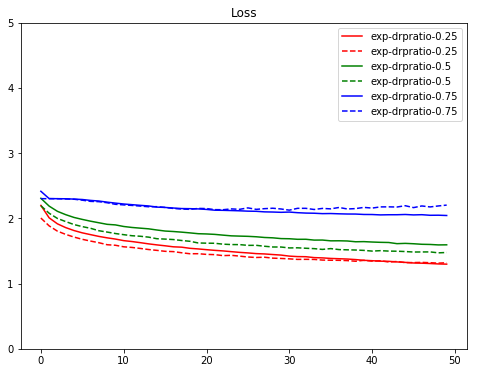

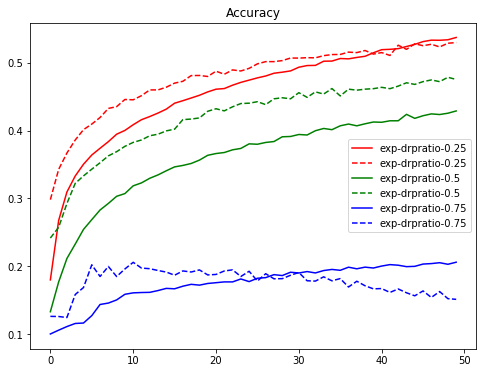

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

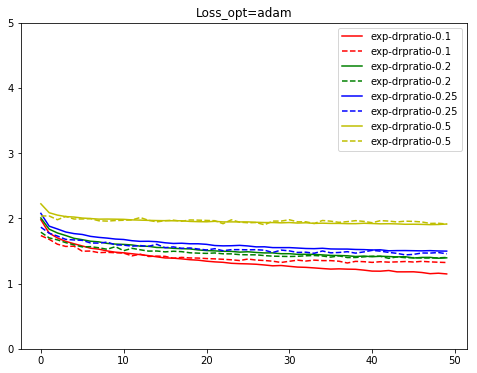

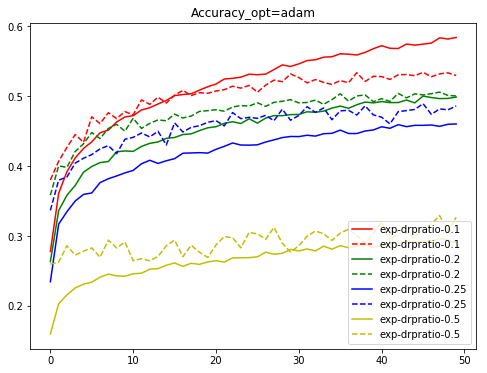

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss_opt=adam")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy_opt=adam")
plt.legend()
plt.show()